In [1]:
import networkx as nx
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr  # Import linregress and pearsonr functions
from pandas.plotting import table 

df = pd.read_csv("org.txt", encoding='utf-8',delimiter=';')

original = nx.Graph()

original = nx.from_pandas_edgelist(df, 'Name', 'Relation\'s Name')

# Assuming you have created the subgraph and eigenvector_centrality as mentioned
print(len(original.nodes),len(original.edges))
# Create a copy of the original graph
G = original.copy()
'''
# List to store nodes to be removed
nodes_to_remove = []

for k, v in eigenvector_centrality.items():
    if v > 0.0013:
        nodes_to_remove.append(k)

# Remove nodes from the subgraph
G.remove_nodes_from(nodes_to_remove)
print(len(subgraph.nodes), len(subgraph.edges))
# Now, subgraph contains only the nodes with eigenvector cendtrality <= 0.0013'''

477 558


'\n# List to store nodes to be removed\nnodes_to_remove = []\n\nfor k, v in eigenvector_centrality.items():\n    if v > 0.0013:\n        nodes_to_remove.append(k)\n\n# Remove nodes from the subgraph\nG.remove_nodes_from(nodes_to_remove)\nprint(len(subgraph.nodes), len(subgraph.edges))\n# Now, subgraph contains only the nodes with eigenvector centrality <= 0.0013'

In [25]:

# Your adjusted_graph
adjusted_graph = G
shortest_paths = nx.shortest_path(G)

# Calculate centrality measures
degree_centrality = nx.degree_centrality(adjusted_graph)
betweenness_centrality = nx.betweenness_centrality(adjusted_graph)
closeness_centrality = nx.closeness_centrality(adjusted_graph)
eigenvector_centrality = nx.eigenvector_centrality(adjusted_graph)

# Get centrality values for each node
degree_values = np.array([degree_centrality[node] for node in adjusted_graph.nodes()])
betweenness_values = np.array([betweenness_centrality[node] for node in adjusted_graph.nodes()])
closeness_values = np.array([closeness_centrality[node] for node in adjusted_graph.nodes()])
eigenvector_values = np.array([eigenvector_centrality[node] for node in adjusted_graph.nodes()])

# Create scatter plots
plt.figure(figsize=(12, 10))

# Define a function to calculate slope, Pearson's r, and plot the scatter plot
def plot_scatter(x, y, x_label, y_label, subplot_position):
    plt.subplot(subplot_position)
    plt.scatter(x, y, alpha=0.5)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    slope, intercept, r, _, _ = linregress(x, y)  # Calculate slope and Pearson's correlation coefficient
    plt.plot(x, slope * x + intercept, color='red', linestyle='--', label=f"Slope = {slope:.2f}")
    plt.legend()
    
    plt.title(f"{x_label} vs {y_label} (Pearson's r = {r:.2f})")





<Figure size 1200x1000 with 0 Axes>

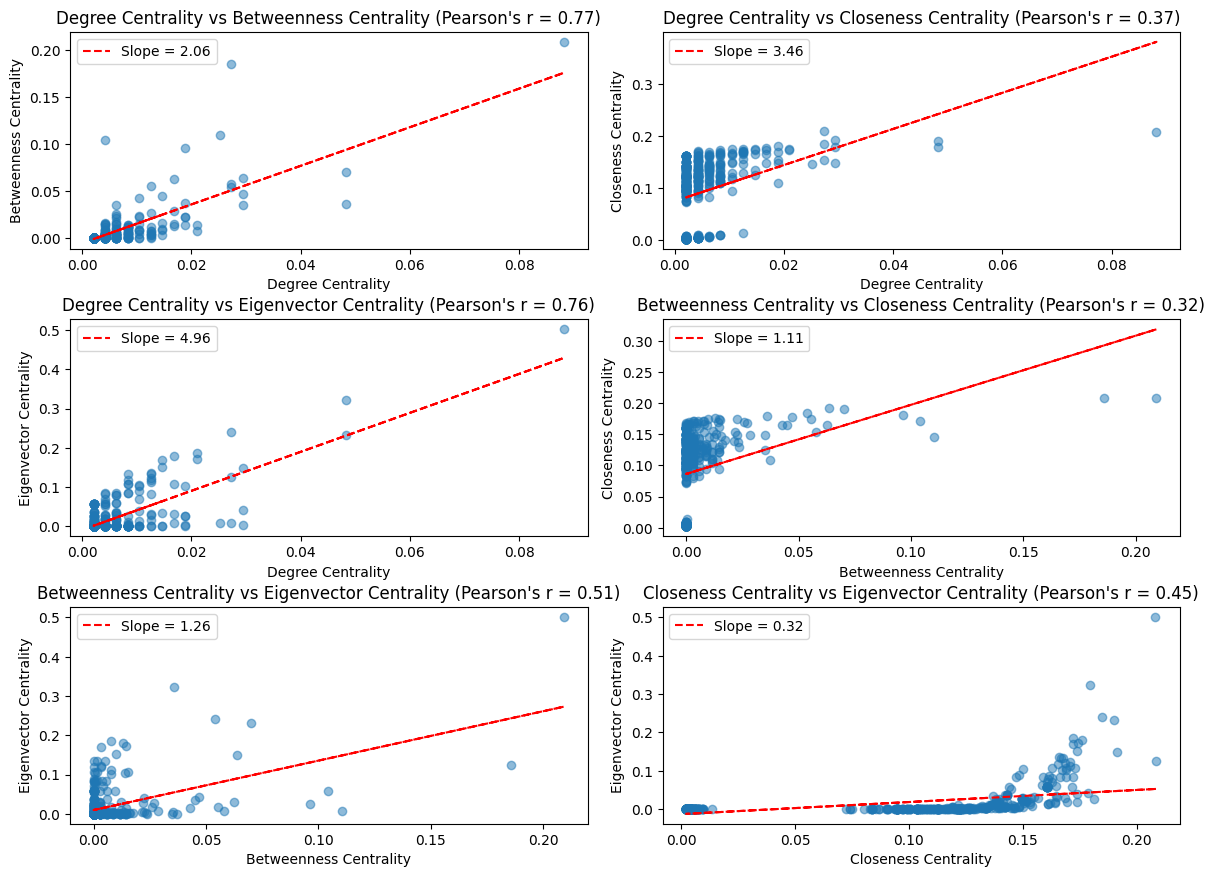

In [26]:

# Create scatter plots
plt.figure(figsize=(12, 10))
# Degree vs Betweenness
plot_scatter(degree_values, betweenness_values, "Degree Centrality", "Betweenness Centrality", 321)

# Degree vs Closeness
plot_scatter(degree_values, closeness_values, "Degree Centrality", "Closeness Centrality", 322)

# Degree vs Eigenvector
plot_scatter(degree_values, eigenvector_values, "Degree Centrality", "Eigenvector Centrality", 323)

# Betweenness vs Closeness
plot_scatter(betweenness_values, closeness_values, "Betweenness Centrality", "Closeness Centrality", 324)

# Betweenness vs Eigenvector
plot_scatter(betweenness_values, eigenvector_values, "Betweenness Centrality", "Eigenvector Centrality", 325)

# Closeness vs Eigenvector
plot_scatter(closeness_values, eigenvector_values, "Closeness Centrality", "Eigenvector Centrality", 326)


plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Save the figure before displaying it
plt.savefig("centralitiescomparisons_shawn.png", dpi=300)

# Display the plot
plt.show()


In [4]:
degree_centrality = nx.degree_centrality(adjusted_graph)

In [27]:
# Calculate average centralities
avg_degree_centrality = np.mean(degree_values)
avg_betweenness_centrality = np.mean(betweenness_values)
avg_closeness_centrality = np.mean(closeness_values)
avg_eigenvector_centrality = np.mean(eigenvector_values)

# Print average centralities
print(f"Average Degree Centrality: {avg_degree_centrality}")
print(f"Average Betweenness Centrality: {avg_betweenness_centrality}")
print(f"Average Closeness Centrality: {avg_closeness_centrality}")
print(f"Average Eigenvector Centrality: {avg_eigenvector_centrality}")

# Calculate and print Pearson's coefficients
degree_betweenness_r, _ = pearsonr(degree_values, betweenness_values)
degree_closeness_r, _ = pearsonr(degree_values, closeness_values)
degree_eigenvector_r, _ = pearsonr(degree_values, eigenvector_values)
betweenness_closeness_r, _ = pearsonr(betweenness_values, closeness_values)
betweenness_eigenvector_r, _ = pearsonr(betweenness_values, eigenvector_values)
closeness_eigenvector_r, _ = pearsonr(closeness_values, eigenvector_values)

print(f"Pearson's r for Degree vs Betweenness: {degree_betweenness_r}")
print(f"Pearson's r for Degree vs Closeness: {degree_closeness_r}")
print(f"Pearson's r for Degree vs Eigenvector: {degree_eigenvector_r}")
print(f"Pearson's r for Betweenness vs Closeness: {betweenness_closeness_r}")
print(f"Pearson's r for Betweenness vs Eigenvector: {betweenness_eigenvector_r}")
print(f"Pearson's r for Closeness vs Eigenvector: {closeness_eigenvector_r}")

# Display commonly used network measures
num_nodes = len(adjusted_graph.nodes())
num_edges = len(adjusted_graph.edges())

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Network density: {nx.density(adjusted_graph)}")
print(f"Global clustering coefficient: {nx.transitivity(adjusted_graph)}")


Average Degree Centrality: 0.004915173616616457
Average Betweenness Centrality: 0.0047953216374269
Average Closeness Centrality: 0.09166362603762773
Average Eigenvector Centrality: 0.01572710085948261
Pearson's r for Degree vs Betweenness: 0.7740929292086605
Pearson's r for Degree vs Closeness: 0.36965565025239294
Pearson's r for Degree vs Eigenvector: 0.7571282412373893
Pearson's r for Betweenness vs Closeness: 0.3150474409165796
Pearson's r for Betweenness vs Eigenvector: 0.5105262417649269
Pearson's r for Closeness vs Eigenvector: 0.4509684621159551
Number of nodes: 477
Number of edges: 558
Network density: 0.004915173616616458
Global clustering coefficient: 0.10052049446974626


In [28]:
# Calculate standard deviations for each centrality measure
std_dev_degree = np.std(list(degree_centrality.values()))
std_dev_closeness = np.std(list(closeness_centrality.values()))
std_dev_betweenness = np.std(list(betweenness_centrality.values()))
std_dev_eigenvector = np.std(list(eigenvector_centrality.values()))

# Find nodes with the highest centrality for each measure
highest_degree_node = max(degree_centrality, key=degree_centrality.get)
highest_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
highest_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
highest_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

# Calculate average centrality for each measure
average_degree_centrality = sum(degree_centrality.values()) / len(degree_centrality)
average_closeness_centrality = sum(closeness_centrality.values()) / len(closeness_centrality)
average_betweenness_centrality = sum(betweenness_centrality.values()) / len(betweenness_centrality)
average_eigenvector_centrality = sum(eigenvector_centrality.values()) / len(eigenvector_centrality)

# Calculate Z-scores and perform hypothesis tests for each measure
alpha = 0.01  # Significance level

# Degree Centrality
z_score_degree = (degree_centrality[highest_degree_node] - average_degree_centrality) / std_dev_degree
critical_value_degree = stats.norm.ppf(1 - alpha / 2)

# Closeness Centrality
z_score_closeness = (closeness_centrality[highest_closeness_node] - average_closeness_centrality) / std_dev_closeness
critical_value_closeness = stats.norm.ppf(1 - alpha / 2)

# Betweenness Centrality
z_score_betweenness = (betweenness_centrality[highest_betweenness_node] - average_betweenness_centrality) / std_dev_betweenness
critical_value_betweenness = stats.norm.ppf(1 - alpha / 2)

# Eigenvector Centrality
z_score_eigenvector = (eigenvector_centrality[highest_eigenvector_node] - average_eigenvector_centrality) / std_dev_eigenvector
critical_value_eigenvector = stats.norm.ppf(1 - alpha / 2)

# Print results for each centrality measure
print("Degree Centrality:")
print("The standard deviation of the degree centrality values is: " + str(std_dev_degree))
print(f"The node with the highest degree centrality is {highest_degree_node} with a degree centrality of {degree_centrality[highest_degree_node]}")
print(f"The average degree centrality is {average_degree_centrality}")
if abs(z_score_degree) > critical_value_degree:
    print(f"With a z_score of {z_score_degree}, we reject the null hypothesis. There is a significant difference.")
else:
    print(f"With a z_score of {z_score_degree}, we fail to reject the null hypothesis. There is no significant difference.")

print("Closeness Centrality:")

print("The standard deviation of the closeness centrality values is: " + str(std_dev_closeness))
print(f"The node with the highest closeness centrality is {highest_closeness_node} with a closeness centrality of {closeness_centrality[highest_closeness_node]}")
print(f"The average closeness centrality is {average_closeness_centrality}")
if abs(z_score_closeness) > critical_value_closeness:
    print(f"With a z_score of {z_score_closeness}, we reject the null hypothesis. There is a significant difference.")
else:
    print(f"With a z_score of {z_score_closeness}, we fail to reject the null hypothesis. There is no significant difference.")
print("Betweenness Centrality:")

print("The standard deviation of the betweenness centrality values is: " + str(std_dev_betweenness))
print(f"The node with the highest betweenness centrality is {highest_betweenness_node} with a betweenness centrality of {betweenness_centrality[highest_betweenness_node]}")
print(f"The average betweenness centrality is {average_betweenness_centrality}")
if abs(z_score_betweenness) > critical_value_betweenness:
    print(f"With a z_score of {z_score_betweenness}, we reject the null hypothesis. There is a significant difference.")
else:
    print(f"With a z_score of {z_score_betweenness}, we fail to reject the null hypothesis. There is no significant difference.")
print("Eigenvector Centrality:")

print("The standard deviation of the eigenvector centrality values is: " + str(std_dev_eigenvector))
print(f"The node with the highest eigenvector centrality is {highest_eigenvector_node} with an eigenvector centrality of {eigenvector_centrality[highest_eigenvector_node]}")
print(f"The average eigenvector centrality is {average_eigenvector_centrality}")
if abs(z_score_eigenvector) > critical_value_eigenvector:
    print(f"With a z_score of {z_score_eigenvector}, we reject the null hypothesis. There is a significant difference.")
else:
    print(f"With a z_score of {z_score_eigenvector}, we fail to reject the null hypothesis. There is no significant difference.")

# Calculate and print Pearson's coefficients
degree_betweenness_r, _ = pearsonr(degree_values, betweenness_values)
degree_closeness_r, _ = pearsonr(degree_values, closeness_values)
degree_eigenvector_r, _ = pearsonr(degree_values, eigenvector_values)
betweenness_closeness_r, _ = pearsonr(betweenness_values, closeness_values)
betweenness_eigenvector_r, _ = pearsonr(betweenness_values, eigenvector_values)
closeness_eigenvector_r, _ = pearsonr(closeness_values, eigenvector_values)

print(f"Pearson's r for Degree vs Betweenness: {degree_betweenness_r}")
print(f"Pearson's r for Degree vs Closeness: {degree_closeness_r}")
print(f"Pearson's r for Degree vs Eigenvector: {degree_eigenvector_r}")
print(f"Pearson's r for Betweenness vs Closeness: {betweenness_closeness_r}")
print(f"Pearson's r for Betweenness vs Eigenvector: {betweenness_eigenvector_r}")
print(f"Pearson's r for Closeness vs Eigenvector: {closeness_eigenvector_r}")

# Display commonly used network measures
num_nodes = len(adjusted_graph.nodes())
num_edges = len(adjusted_graph.edges())

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Network density: {nx.density(adjusted_graph)}")
print(f"Global clustering coefficient: {nx.transitivity(adjusted_graph)}")


shortest_paths = nx.shortest_path(G)


average_path_length = sum([len(shortest_path) for shortest_path in shortest_paths]) / len(shortest_paths)

print("The average path length is", average_path_length)

Degree Centrality:
The standard deviation of the degree centrality values is: 0.006561445161636842
The node with the highest degree centrality is Giacomo Medici with a degree centrality of 0.08823529411764705
The average degree centrality is 0.004915173616616446
With a z_score of 12.698440427145972, we reject the null hypothesis. There is a significant difference.
Closeness Centrality:
The standard deviation of the closeness centrality values is: 0.061503729354815205
The node with the highest closeness centrality is Sotheby's with a closeness centrality of 0.20874559501219841
The average closeness centrality is 0.09166362603762766
With a z_score of 1.903656415680495, we fail to reject the null hypothesis. There is no significant difference.
Betweenness Centrality:
The standard deviation of the betweenness centrality values is: 0.0174377376405922
The node with the highest betweenness centrality is Giacomo Medici with a betweenness centrality of 0.20917023724324385
The average betweennes

In [33]:
# Create a Network instance
nt = Network(notebook=True, height="1200", width='70%')  # Set notebook=False to render without the notebook

# Custom scaling function for node size
def custom_scale(value, min_value, max_value, min_size, max_size):
    return min_size + (max_size - min_size) * (value - min_value) / (max_value - min_value)

# Find the minimum and maximum degree centrality values
min_centrality = min(degree_centrality.values())
max_centrality = max(degree_centrality.values())



# Add nodes to the Pyvis Network with colors and sizes based on degree centrality
for node, centrality in degree_centrality.items():
    color = colors.rgb2hex(cm.Spectral((centrality - min_centrality) / (max_centrality - min_centrality)))
    node_size = custom_scale(centrality, min_centrality, max_centrality, min_size=10, max_size=50)
    nt.add_node(node, color=color, size=node_size)
   
# Add edges from your original 'ego' graph
for edge in G.edges():
    nt.add_edge(edge[0], edge[1])

# Create an HTML file to display the visualization
html_file = 'graph.html'
nt.toggle_physics(True)
nt.show_buttons(filter_=['physics'])
nt.show(html_file)


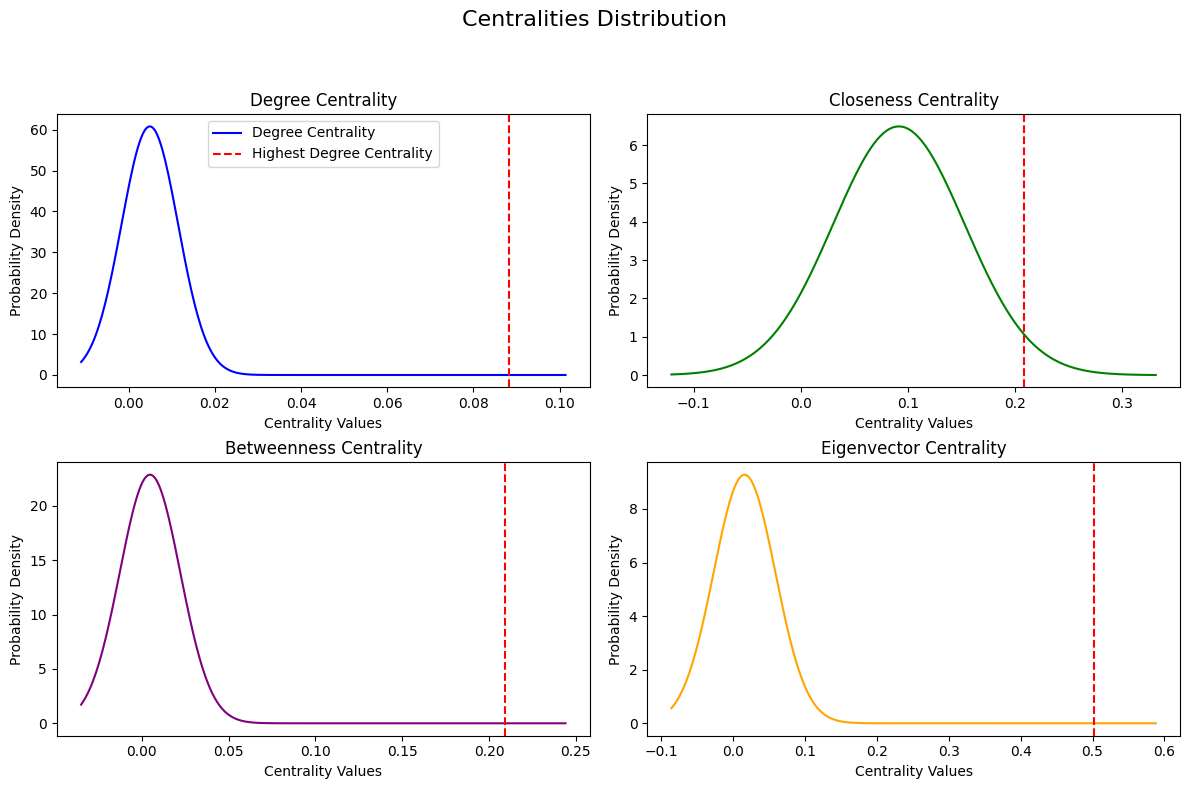

In [34]:
# Replace these with your actual centrality values, standard deviations, and averages
centrality_values = {
    "Degree": degree_centrality.values(),
    "Closeness": closeness_centrality.values(),
    "Betweenness": betweenness_centrality.values(),
    "Eigenvector": eigenvector_centrality.values()
}

std_dev = {
    "Degree": std_dev_degree,
    "Closeness": std_dev_closeness,
    "Betweenness": std_dev_betweenness,
    "Eigenvector": std_dev_eigenvector
}

average_centrality = {
    "Degree": average_degree_centrality,
    "Closeness": average_closeness_centrality,
    "Betweenness": average_betweenness_centrality,
    "Eigenvector": average_eigenvector_centrality
}

# Create a dictionary to store the colors for each centrality measure
centrality_colors = {
    "Degree": 'blue',
    "Closeness": 'green',
    "Betweenness": 'purple',
    "Eigenvector": 'orange'
}

# Create subplots in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Centralities Distribution', fontsize=16)

# Iterate through each centrality measure
for i, centrality_measure in enumerate(centrality_values):
    # Extract the highest centrality value for the current measure
    highest_value = max(centrality_values[centrality_measure])
    
    # Calculate the range of x values for the Gaussian (normal) distribution
    x_min = min(centrality_values[centrality_measure]) - 2 * std_dev[centrality_measure]
    x_max = max(centrality_values[centrality_measure]) + 2 * std_dev[centrality_measure]
    x = np.linspace(x_min, x_max, 300)
    
    # Create the Gaussian plot for the current centrality measure
    pdf = stats.norm.pdf(x, average_centrality[centrality_measure], std_dev[centrality_measure])
    row, col = i // 2, i % 2  # Calculate row and column for subplot
    axs[row, col].plot(x, pdf, label=f'{centrality_measure} Centrality', color=centrality_colors[centrality_measure])
    
    # Highlight the highest centrality value in red
    axs[row, col].axvline(x=highest_value, linestyle='--', color='red', label=f'Highest {centrality_measure} Centrality')
    
    axs[row, col].set_xlabel('Centrality Values')
    axs[row, col].set_ylabel('Probability Density')
    axs[row, col].set_title(f'{centrality_measure} Centrality')

# Add legend to the first subplot (top-left)
axs[0, 0].legend()

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Save or display the plots
plt.savefig('centrality_gaussian_plots_shawn.png', dpi=300)  # Adjust dpi as needed
plt.show()


In [49]:
# Create the data
data = {
    "Centrality Measure": ["Degree ", "Closeness Centrality", "Betweenness Centrality", "Eigenvector Centrality"],
    "Standard deviation": [std_dev_degree, std_dev_closeness, std_dev_betweenness, std_dev_eigenvector],
    "Node with highest centrality": [max(degree_centrality, key=degree_centrality.get), max(betweenness_centrality, key=betweenness_centrality.get), max(closeness_centrality, key=closeness_centrality.get), max(eigenvector_centrality, key=eigenvector_centrality.get)],
    "Average centrality": [average_degree_centrality, average_closeness_centrality, average_betweenness_centrality, average_eigenvector_centrality],
    "z-score": [z_score_degree, z_score_closeness, z_score_betweenness, z_score_eigenvector],
    "significane": ['True','False','True','True'],
}
df = pd.DataFrame(data)
import dataframe_image as dfi
dfi.export(df, "df_org.png", dpi = 300)
print(df)

       Centrality Measure  Standard deviation Node with highest centrality  \
0                 Degree             0.006561               Giacomo Medici   
1    Closeness Centrality            0.061504               Giacomo Medici   
2  Betweenness Centrality            0.017438                    Sotheby's   
3  Eigenvector Centrality            0.043001               Giacomo Medici   

   Average centrality    z-score significane  
0            0.004915  12.698440        True  
1            0.091664   1.903656       False  
2            0.004795  11.720266        True  
3            0.015727  11.308037        True  


In [36]:
# Get the top 10 nodes with the highest centrality for each measure
top_10_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 nodes for each measure
print("Top 10 nodes with highest Degree Centrality:")
for node, centrality in top_10_degree:
    print(f"Node: {node}, Degree Centrality: {centrality}")

print("\nTop 10 nodes with highest Betweenness Centrality:")
for node, centrality in top_10_betweenness:
    print(f"Node: {node}, Betweenness Centrality: {centrality}")

print("\nTop 10 nodes with highest Closeness Centrality:")
for node, centrality in top_10_closeness:
    print(f"Node: {node}, Closeness Centrality: {centrality}")

print("\nTop 10 nodes with highest Eigenvector Centrality:")
for node, centrality in top_10_eigenvector:
    print(f"Node: {node}, Eigenvector Centrality: {centrality}")

Top 10 nodes with highest Degree Centrality:
Node: Giacomo Medici, Degree Centrality: 0.08823529411764705
Node: J Paul Getty Museum, Degree Centrality: 0.04831932773109243
Node: Gianfranco Becchina, Degree Centrality: 0.04831932773109243
Node: Leonardo Patterson, Degree Centrality: 0.029411764705882353
Node: Metropolitan Museum of Art, Degree Centrality: 0.029411764705882353
Node: Vaman Ghiya, Degree Centrality: 0.029411764705882353
Node: David Swetnam, Degree Centrality: 0.0273109243697479
Node: Robert Hecht, Degree Centrality: 0.0273109243697479
Node: Sotheby's, Degree Centrality: 0.0273109243697479
Node: Robert Olson, Degree Centrality: 0.025210084033613446

Top 10 nodes with highest Betweenness Centrality:
Node: Giacomo Medici, Betweenness Centrality: 0.20917023724324385
Node: Sotheby's, Betweenness Centrality: 0.18562216189432784
Node: Robert Olson, Betweenness Centrality: 0.11034615951643811
Node: Asia, Betweenness Centrality: 0.10404806132979505
Node: New York, Betweenness Centr

In [37]:
nx.write_gexf(G, "org.gexf")

In [38]:
# nodes connected to Putin
nx.node_connected_component(G,"Giacomo Medici")

{'Abraham Trust',
 'Aidonia_Greece',
 'Aidonia_Greece Treasure',
 'Alan C Lapiner',
 'Alistair McAlpine',
 'Andre Emmerich Gallery',
 'André Emmerich',
 'Anna Spinello',
 'Anne-Louise Schaffer',
 'Antalya',
 'Antalya Museum',
 'Antike Kunst Palladion',
 'Antiquaria Romana',
 'Anton Roeckl',
 'Anton Tkalec',
 "Antonio ‘Nino' Savoca",
 'Archaeological Survey of India',
 'Armand Labbé',
 'Art Collections Conservation Network',
 'Art Consultancy',
 'Art Gallery of New South Wales',
 'Art Loss Register',
 'Artistic Imports Corporation )',
 'Arts Franc',
 'Ashmolean Museum',
 'Asia',
 'Athens',
 'Atlantis Antiquities',
 'Atru',
 'Ballcourt Marker',
 'Ban Chiang',
 'Ban Chiang pottery',
 'Bangkok',
 "Bangkok University's Southeast Asian Ceramics Museum",
 'Barbara Fleischman',
 'Barry MacLean',
 'Barry Stern',
 'Benjamin Bishop Johnson',
 'Berry & Stark Associates',
 'Bobbyo Imports',
 'Bolivia',
 'Bonhams',
 'Boston Museum of Fine Arts',
 'Bowers Museum',
 'Brendan Lynch',
 'British Columbia

In [39]:
nx.clustering(G).values()

dict_values([0.047619047619047616, 0, 1.0, 0.05128205128205128, 0, 0.02197802197802198, 0.0429732868757259, 1.0, 0, 0, 0, 0.015151515151515152, 0, 0, 0, 0, 0, 0, 0.3333333333333333, 0.1, 0.08333333333333333, 0, 0, 0, 0.6666666666666666, 0.14285714285714285, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0.13333333333333333, 0, 0.26666666666666666, 0.3333333333333333, 0.3, 0.09486166007905138, 0.4, 0, 0.0989010989010989, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0.1388888888888889, 0, 0, 0.3333333333333333, 0.6666666666666666, 0.5, 0.5, 0, 0, 0.39285714285714285, 0.16666666666666666, 0.16666666666666666, 0.6666666666666666, 0.1794871794871795, 0, 0, 0.4, 0.3333333333333333, 0.3, 0.3333333333333333, 0.3333333333333333, 0, 0, 0, 0, 0, 0, 0.8333333333333334, 0, 0, 0, 0, 0, 0, 0.3333333333333333, 0, 0.19047619047619047, 0.6666666666666666, 0, 0, 0, 0, 0, 0.3333333333333333, 0, 0.23809523809523808, 0.04743083003952569, 0, 0.6666666666666666, 0, 0.07692307692307693, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.07142857142857

In [40]:
print(nx.average_degree_connectivity(G))


{7: 8.114285714285714, 1: 6.776951672862453, 2: 6.00531914893617, 13: 8.051282051282051, 14: 4.857142857142857, 42: 4.9523809523809526, 6: 8.681818181818182, 4: 6.224137931034483, 12: 2.4166666666666665, 3: 5.692982456140351, 5: 6.8, 9: 5.311111111111111, 8: 8.0625, 10: 10.45, 23: 6.1521739130434785}


6.569916843780299


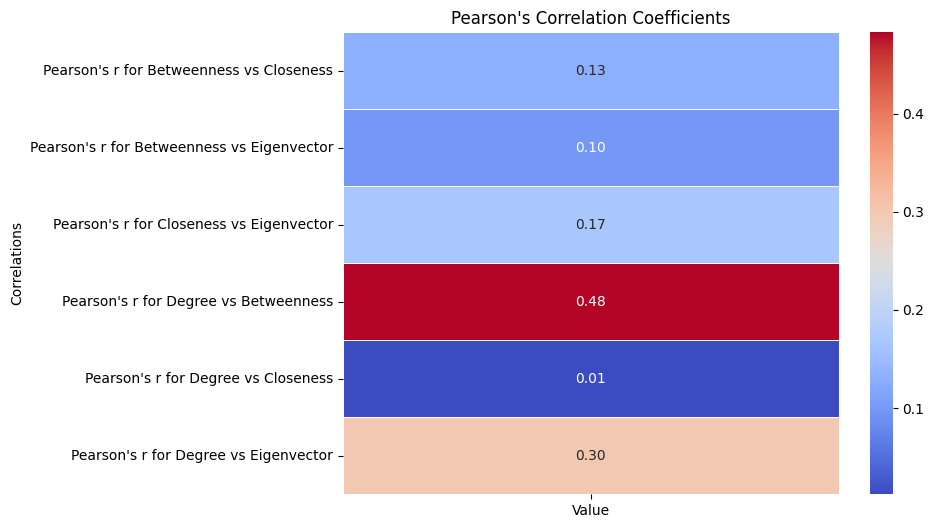

In [41]:
a = nx.average_degree_connectivity(G)

avg = sum(a.values()) / len(a)

print(avg)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the table
correlation_data = {
    "Correlations": [
        "Pearson's r for Degree vs Betweenness",
        "Pearson's r for Degree vs Closeness",
        "Pearson's r for Degree vs Eigenvector",
        "Pearson's r for Betweenness vs Closeness",
        "Pearson's r for Betweenness vs Eigenvector",
        "Pearson's r for Closeness vs Eigenvector"
    ],
    "Value": [0.4827761225992819, 0.012150583167378498, 0.2999415686930362, 0.130514390746174, 0.09764807195760944, 0.169888772064223]
}

# Create a DataFrame
df = pd.DataFrame(correlation_data)

# Pivot the DataFrame to make it suitable for the heatmap
heatmap_data = df.pivot_table(index='Correlations', values='Value', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson's Correlation Coefficients")
plt.show()



In [42]:
ego_node = 'Giacomo Medici'
ego_network = nx.ego_graph(G, ego_node)
print(ego_network)

Graph with 43 nodes and 79 edges


In [43]:
radius = len(ego_network)
print(radius)

43


In [44]:
# Specify the ego node
# Create the ego network
ego_network = nx.ego_graph(G, ego_node, radius=radius)

# Calculate network metrics for the ego network
degree_centrality = nx.degree_centrality(ego_network)
#betweenness_centrality = nx.betweenness_centrality(ego_network)
#closeness_centrality = nx.closeness_centrality(ego_network)
#eigenvector_centrality = nx.eigenvector_centrality(ego_network)


In [45]:
ego = ego_network

In [48]:
import networkx as nx
from pyvis.network import Network
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Create a Network instance
nt = Network(notebook=True, height="1280", width='50%')  # Set notebook=False to render without the notebook
ego = ego.copy()
for node in ego.nodes():
    ego.nodes[node]['label'] = ''
# Assuming you already have a NetworkX graph 'ego' defined
# Calculate degree centrality for each node
#degree_centrality = nx.degree_centrality(ego)

# Custom scaling function for node size
def custom_scale(value, min_value, max_value, min_size, max_size):
    return min_size + (max_size - min_size) * (value - min_value) / (max_value - min_value)

# Find the minimum and maximum degree centrality values
min_centrality = min(degree_centrality.values())
max_centrality = max(degree_centrality.values())

# Create a custom legend for the color range
legend_labels = ['Low', 'Medium', 'High']
legend_colors = [colors.rgb2hex(cm.Spectral(x)) for x in [0.2, 0.5, 0.8]]
legend_patches = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

# Add nodes to the Pyvis Network with colors and sizes based on degree centrality
for node, centrality in degree_centrality.items():
    color = colors.rgb2hex(cm.Spectral((centrality - min_centrality) / (max_centrality - min_centrality)))
    node_size = custom_scale(centrality, min_centrality, max_centrality, min_size=10, max_size=100)
    if node == ego_node:
        nt.add_node(node, color=color, size=node_size)
    else:
        nt.add_node(node, color=color, size=node_size)

# Add edges from your original 'ego' graph
for edge in ego.edges():
    nt.add_edge(edge[0], edge[1])

# Create an HTML file to display the visualization
html_file = 'graph_subset.html'
nt.toggle_physics(True)
nt.show_buttons(filter_=['physics'])
nt.show(html_file)


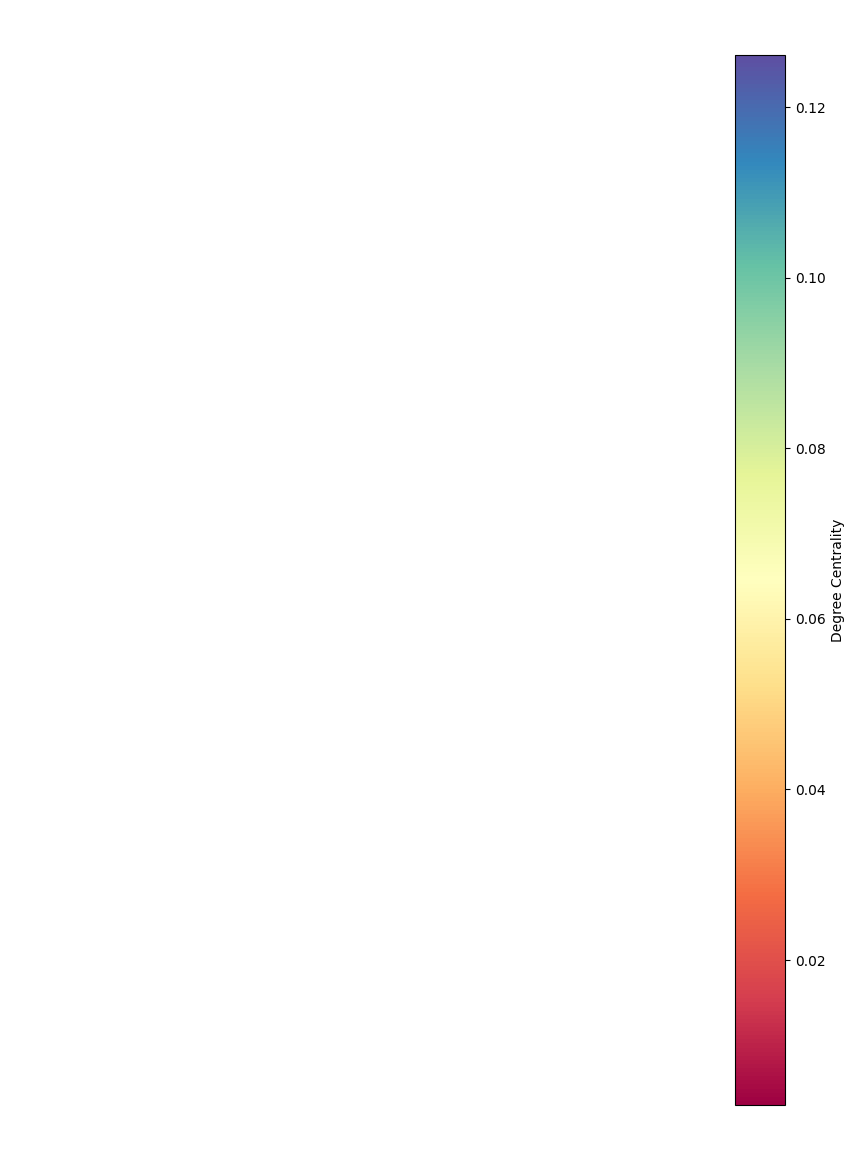

In [47]:

# Create a colorbar for degree centrality
node_colors = list(degree_centrality.values())
sm = plt.cm.ScalarMappable(cmap='Spectral', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm._A = []  # Fake up the array
# Create a colorbar for degree centrality
fig, ax = plt.subplots(figsize=(10, 15))
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7])  # Adjust the position and size of the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Degree Centrality')

# Remove the box and axis
ax.axis('off')

# Save the colorbar as a separate image with height of 2000 pixels
plt.savefig('colorbar.png', bbox_inches='tight', dpi=300)
plt.show()
plt.close()